In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Load your CSV file
df = pd.read_csv("../Data/Cleaned/sanitized_property_listings_Kelli_final.csv")

if df is None:
    print("DataFrame not loaded correctly, df is None.")
else:
    print("DataFrame loaded successfully.")

print(df.shape)

# Sort the DataFrame by 'Price' in descending order and exclude the first 16 rows. These were checked as 'bad data' outliers.
df_sorted = df.sort_values(by='Price', ascending=False).iloc[16:]
df_sorted = df[df['Price'] < 1000000]
print(df_sorted.shape)


DataFrame loaded successfully.
(9033, 15)
(8356, 15)



## Kelli
### Comparing boxplots before and after manual outlier removal calculation
Conclusion:
    The first boxplot (before outlier removal) is useful to understand the full range and outlier impact on property prices.
    The second boxplot (after outlier removal) gives a better representation of the central market trends and is less affected by extreme values.
    By comparing the two boxplots, you can see how outliers impact the central tendency (median) and the spread of data. Removing them provides a cleaner and more focused view of the typical property prices.

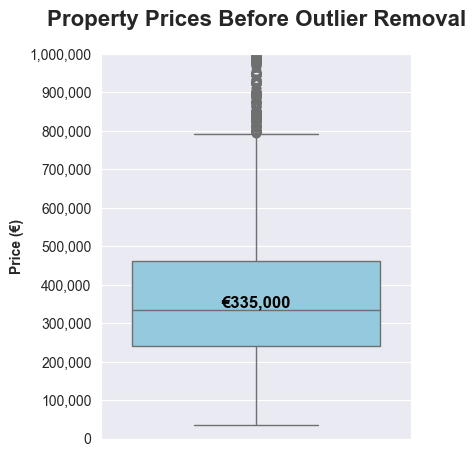

In [80]:
# Plot before outlier removal
fig, ax = plt.subplots(figsize=(4, 5))
sns.boxplot(y='Price', data=df_sorted, color="skyblue")
plt.title('Property Prices Before Outlier Removal', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Price (€)', fontweight='bold')
# Set custom y-axis tick labels
yticks = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]
plt.yticks(yticks, [f'{y:,.0f}' for y in yticks])
plt.ylim(0, 1000000)
yticks = np.arange(0, 1000000 + 100000, 100000)  # Create y-ticks at intervals of 100,000 euros
# plt.yticks(yticks, [f'€ {y:,.0f}' for y in yticks])  # Format y-tick labels with euro symbol

median_price = df_sorted['Price'].median()
plt.text(0, median_price, f'€{median_price:,.0f}', ha='center', va='bottom', fontsize=12, color='black',
         fontweight='bold')
plt.show()

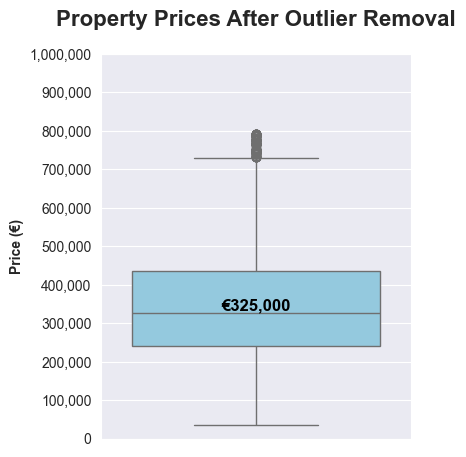

In [81]:
# IQR
# Calculate the upper and lower limits based on IQR
Q1 = df_sorted['Price'].quantile(0.25)
Q3 = df_sorted['Price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Identify the indices of rows that are upper and lower outliers
outliers = df_sorted[(df_sorted['Price'] < lower) | (df_sorted['Price'] > upper)].index

# Remove all outliers from the DataFrame
df_cleaned = df_sorted.drop(index=outliers)

# Plot after outlier removal
plt.figure(figsize=(4, 5))
sns.boxplot(y='Price', data=df_cleaned, color="skyblue")
plt.title('Property Prices After Outlier Removal', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Price (€)', fontweight='bold')

max_value = df_cleaned['Price'].max()
plt.ylim(0, 1000000)
yticks = np.arange(0, 1000000 + 100000, 100000)  # Create y-ticks at intervals of 100,000 euros
plt.yticks(yticks, [f'{y:,.0f}' for y in yticks])  # Format y-tick labels with euro symbol

# Add an annotation for the median value inside the box
median_price = df_cleaned['Price'].median()
plt.text(0, median_price, f'€{median_price:,.0f}', ha='center', va='bottom', fontsize=12, 
         color='black', fontweight='bold')


plt.show()

### Histogram to compare price distribution before and after outlier removal
The bars in the histogram are grouped into bins based on the range of values they represent. They are essentially ranges of the price values. The width of each bin determines how many values will be grouped together within that bin. For instance, if you have prices ranging from €0 to €1,000,000, and you use 30 bins, each bin would represent a range of approximately €33,333.

Calculate the upper and lower limits based on IQR (interquartile range).

Frequency refers to the count of data points (or number of occurrences) that fall within each bin of the histogram. This reduced after outliers have been accounted for because the number of listings was also reduced bringing the top of the hill down.

Impact of Outliers on Data:
    In the before histogram, the long tail towards the higher end indicates that there were properties significantly more expensive than the rest, causing positive skew.
    In the after histogram, removing these extreme values leads to a more balanced representation of the typical property prices, focusing on the core data.

Central Tendency:
    The peak of the histogram after outlier removal is more indicative of the true central tendency of property prices, as it is not pulled by extreme high values.
    The mean and median values become more representative of the majority of the properties after outliers are removed.    

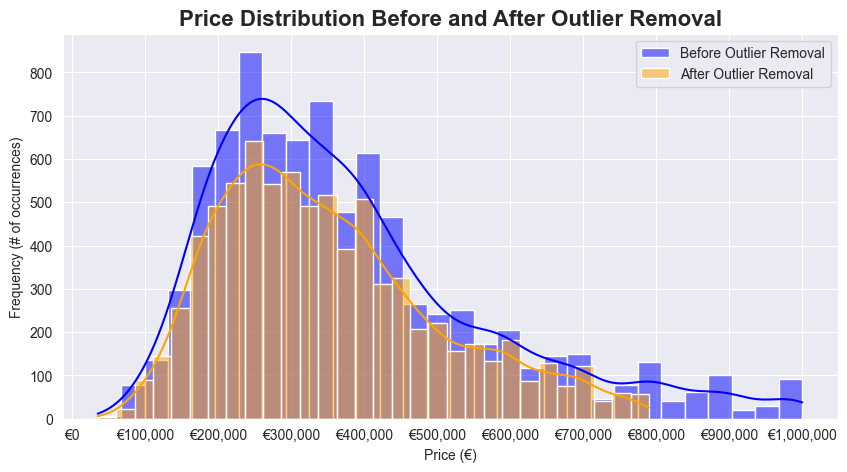

In [82]:
def histogram_outlier_removal(dataset_clean, dataset_outliers):
    plt.figure(figsize=(10, 5))
    # Plot a histogram to compare price distribution before and after outlier removal
    sns.histplot(dataset_outliers['Price'], color='blue', label='Before Outlier Removal', kde=True, bins=30)
    sns.histplot(dataset_clean['Price'], color='orange', label='After Outlier Removal', kde=True, bins=30)
    
    plt.title('Price Distribution Before and After Outlier Removal', fontsize=16, fontweight='bold')
    plt.xlabel('Price (€)')
    plt.ylabel('Frequency (# of occurrences)')
    plt.legend()

    # Set x-axis tick labels to add more points, at intervals of 100,000 euros
    max_price = max(dataset_outliers['Price'].max(), dataset_clean['Price'].max())  # Get the maximum value from both datasets
    tick_interval = 100000  # Set tick interval at 100,000 euros
    ticks = np.arange(0, max_price + tick_interval, tick_interval)  # Create an array of tick positions at 100,000 intervals
    plt.xticks(ticks, [f'€{int(x):,}' for x in ticks])  # Set the x-axis tick labels with formatting
    plt.show()
    
histogram_outlier_removal(df_cleaned, df_sorted)

## Kevin

More accurate boxplot analysis

Separated the variables into 2 new subcategories in order to see a more accurate presentation of the values in the dataframe. I classified them as regular and affluent seeing as there's a significant variance present.
### The first one was done for the Terrace Surface variable.

/var/folders/l5/7p063qh11pgdrhzhyzjztv3c0000gn/T/ipykernel_69282/3670303988.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrace_surface_cleaned.loc[:, 'Terrace_Category'] = pd.cut(terrace_surface_cleaned['Terrace surface m²'], bins=bins, labels=labels, right=False)


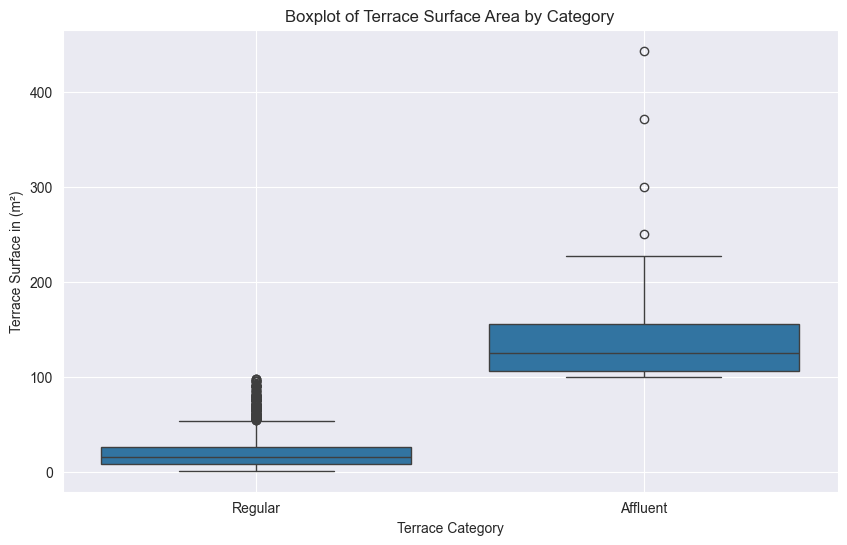

In [83]:
''' 
Terrace surface subcategories

'''
# Load the cleaned data
kelli_data = pd.read_csv('../Data/Cleaned/sanitized_property_listings_Kelli_final.csv')
final_data = kelli_data[kelli_data['Price'] < 1000000].copy()  # Use .copy() to avoid SettingWithCopyWarning
terrace_surface_cleaned = final_data.dropna(subset= ['Terrace surface m²'], axis=0, inplace=False)
bins = [0, 100, 500]
labels = ['Regular', 'Affluent']

# Categorize the terrace area
terrace_surface_cleaned.loc[:, 'Terrace_Category'] = pd.cut(terrace_surface_cleaned['Terrace surface m²'], bins=bins, labels=labels, right=False)

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=terrace_surface_cleaned, x='Terrace_Category', y='Terrace surface m²')
plt.title('Boxplot of Terrace Surface Area by Category')
plt.xlabel('Terrace Category')
plt.grid(True)
plt.ylabel('Terrace Surface in (m²)')
plt.show()

### Boxplot for the Living Area variable

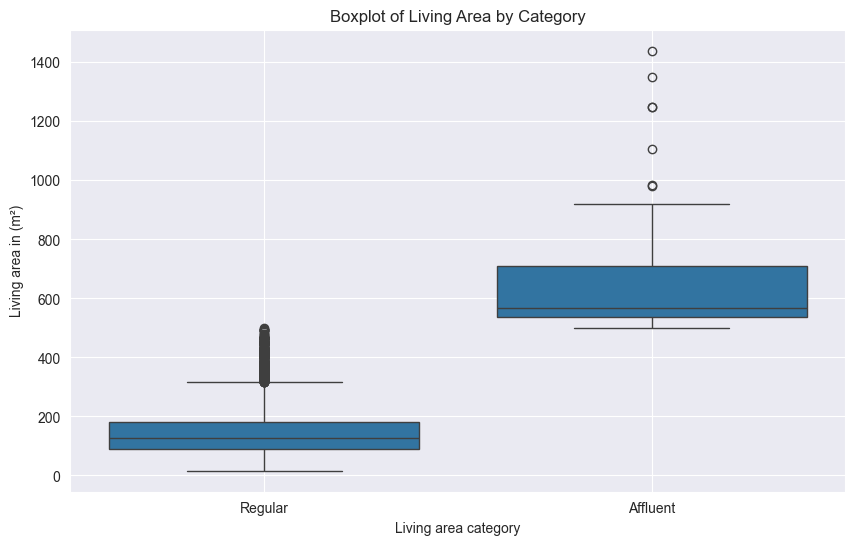

In [84]:
bins = [0, 500, 1500]
labels = ['Regular', 'Affluent']

# Categorize the terrace area
final_data.loc[:, 'Living area category'] = pd.cut(final_data['Living area m²'], bins=bins, labels=labels, right=False)

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_data, x='Living area category', y='Living area m²')
plt.title('Boxplot of Living Area by Category')
plt.xlabel('Living area category')
plt.grid(True)
plt.ylabel('Living area in (m²)')
plt.show()

### Boxplot for the Garden area variable

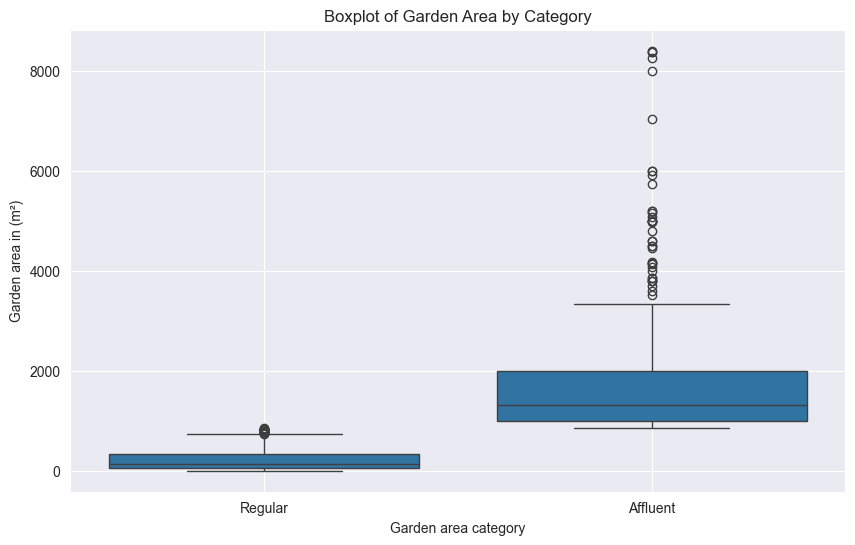

In [85]:
bins = [0, 850, 10000]
labels = ['Regular', 'Affluent']

# Categorize the terrace area
final_data.loc[:, 'Garden area category'] = pd.cut(final_data['Garden area m²'], bins=bins, labels=labels, right=False)

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_data, x='Garden area category', y='Garden area m²')
plt.title('Boxplot of Garden Area by Category')
plt.xlabel('Garden area category')
plt.grid(True)
plt.ylabel('Garden area in (m²)')
plt.show()


## Maarten

/Users/kelligriffin/immoeliza_data_analysis/env/lib/python3.12/site-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 1.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "
/Users/kelligriffin/immoeliza_data_analysis/env/lib/python3.12/site-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 1.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "
/Users/kelligriffin/immoeliza_data_analysis/env/lib/python3.12/site-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and wi

AttributeError: 'Axes' object has no attribute 'show'

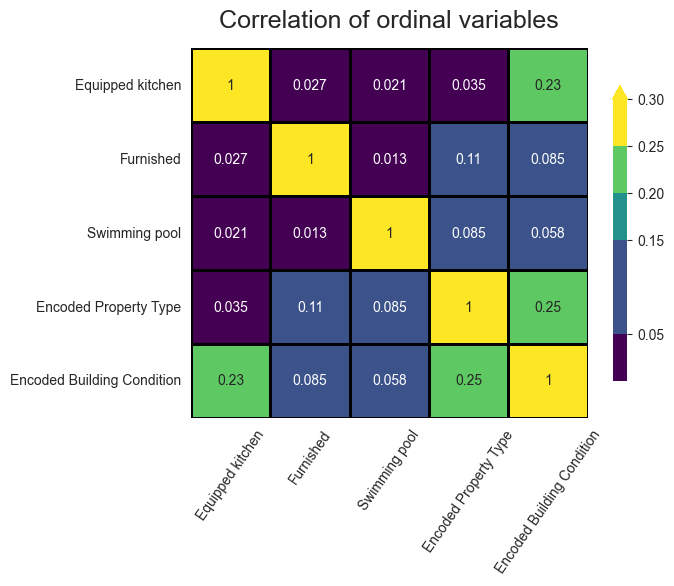

In [86]:
import pandas as pd
import  numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import researchpy as rp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

data = pd.read_csv("../Data/Cleaned/sanitized_property_listings_Kelli_final.csv")

# Removing outliers (price > 1mil)
data = data[data['Price'] < 1000000]

# Transforming qualitative into numerical
label_encoder_property_type = LabelEncoder()
label_encoder_condition = LabelEncoder()
data['Encoded Property Type'] = label_encoder_property_type.fit_transform(data['Property type'])
data['Encoded Building Condition'] = label_encoder_condition.fit_transform(data['Building condition'])

# CORRELATION BETWEEN NOMINAL VARIABLES WITH CRAMER'S V
data_3 = data[['Equipped kitchen', 'Furnished', 'Swimming pool', 'Encoded Property Type', 'Encoded Building Condition']]
data_cramersv = {}
for i in data_3.columns:
    item_list = []
    for j in data_3.columns:
        ctab, res = rp.crosstab(data[i], data[j], test="chi-square")
        item_list.append(res['results'][2])
    data_cramersv[i] = item_list

data_coiff = pd.DataFrame(data_cramersv)

# plotting the heatmap
    # create a custom colorblind-friendly colormap
viridis_colors = plt.cm.viridis([0.0, 0.25, 0.25, 0.5, 0.75, 1.0])
custom_cmap = ListedColormap(viridis_colors)

hm = sns.heatmap(data = data_coiff, vmin=0.0, vmax=0.3, annot=True, linewidth=2, linecolor="black", yticklabels=['Equipped kitchen', 'Furnished', 'Swimming pool', 'Encoded Property Type', 'Encoded Building Condition'], cmap=custom_cmap, cbar_kws={'ticks': [.05, .15, .20, .25, .30], 'extend': 'max', 'shrink': 0.8})
plt.title('Correlation of ordinal variables', size=18, pad=15)
plt.xticks(rotation=55)
hm.show()


0.8140134165755325


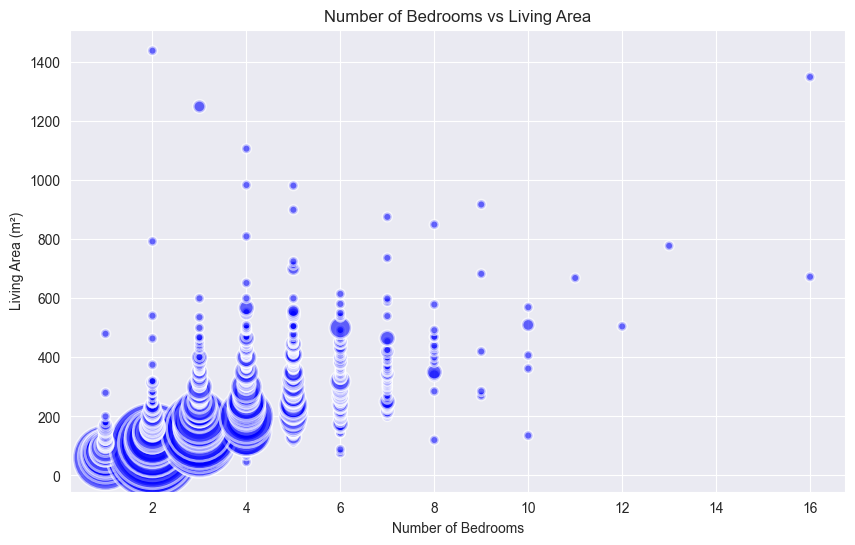

In [87]:
# CORRELATION BETWEEN NUMERICAL VARIABLES, NO NORMAL DISTRIBUTION
data_2 = data[['Number of bedrooms', 'Living area m²']]

# Print the correlation
print(data_2.corr(method='spearman').loc['Number of bedrooms', 'Living area m²'])

# Group and count the number of occurrences of each combination of 'Living area m²' and 'Number of bedrooms'
counts_per_livingarea = data.groupby(['Living area m²', 'Number of bedrooms']).size().reset_index(name='counts')
x = counts_per_livingarea['Number of bedrooms']
y = counts_per_livingarea['Living area m²']
sizes = counts_per_livingarea['counts'] * 40 # Adjust bubble size as needed for better visualization

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=sizes, alpha=0.6, color='blue', edgecolors="w", linewidth=2)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Living Area (m²)')
plt.title('Number of Bedrooms vs Living Area')

plt.show()

## Anastasiia

In [88]:
# Function to determine the region by zip code
def get_region(postal_code):
    if 1000 <= postal_code <= 1299:
        return 'Brussels'
    elif 1300 <= postal_code <= 1499 or 4000 <= postal_code <= 7999:
        return 'Wallonia'
    elif 1500 <= postal_code <= 3999 or 8000 <= postal_code <= 8999 :
        return 'Flanders'
    else:
        return 'Unknown'
# Add a new 'Region' column based on zip code
df_cleaned['Region'] = df_cleaned['Locality data'].apply(get_region)
# We check the result
df_cleaned[['Locality data', 'Region']].head()

,Locality data,Region
0,9550,Unknown
1,2170,Flanders
2,4102,Wallonia
3,9620,Unknown
5,8500,Flanders


In [96]:
# Loading cleared data
df_cleaned = pd.read_csv('../Data/Cleaned/sanitized_property_listings_Kelli_final_sorted.csv')
# Add the 'Price per m²' column
df_cleaned['Price per m²'] = df_cleaned['Price'] / df_cleaned['Living area m²']
# Updated function to determine region by zip code
def get_region(postal_code):
    postal_code = int(str(postal_code)[:4]) # We take the first 4 digits of the index
    if 1000 <= postal_code <= 1299:
        return 'Brussels'
    elif (1300 <= postal_code <= 1499) or (4000 <= postal_code <= 7999):
        return 'Wallonia'
    elif (1500 <= postal_code <= 3999) or (8000 <= postal_code <= 9999):
        return 'Flanders'
    else:
        return 'Unknown'
# Add a new 'Region' column based on zip code
df_cleaned['Region'] = df_cleaned['Locality data'].apply(get_region)
# Saving a new file with added columns
output_file_path = '..\Data\Cleaned\cleaned_data_with_region_and_price_per_m2.csv'
df_cleaned.to_csv(output_file_path, index=False)
print(f'File successfully saved as {output_file_path}')

# A function to determine the province by postal code
def get_province(postal_code):
    # Flanders
    if 1500 <= postal_code <= 1999 or 3000 <=postal_code <=3499:
        return 'Flemish Brabant'
    elif 2000 <= postal_code <= 2999:
        return 'Antwerp'
    elif 3500 <= postal_code <= 3999:
        return 'Limburg'
    elif 8000 <= postal_code <= 8999:
        return 'West Flanders'
    elif 9000 <= postal_code <= 9999:
        return 'East Flanders'

    # Wallonia
    elif 1300 <= postal_code <= 1499:
        return 'Walloon Brabant'
    elif 4000 <= postal_code <= 4999:
        return 'Liège'
    elif 5000 <= postal_code <= 5999:
        return 'Namur'
    elif 6000 <= postal_code <= 6599 or 7000 <= postal_code <= 7999:
        return 'Hainaut'
    elif 6600 <= postal_code <= 6999:
        return 'Luxembourg'

    # Brussels
    elif 1000 <= postal_code <= 1299:
        return 'Brussels'

    else:
        return 'Unknown'
# Adding a new column 'Province' based on the postal code
df_cleaned['Province'] = df_cleaned['Locality data'].apply(get_province)
# Save updated file with column 'Province'
output_file_path = '../Data/Cleaned/cleaned_data_with_region_and_price_per_m2.csv'
df_cleaned.to_csv(output_file_path, index=False)
print(f'File successfully saved as: {output_file_path}')
# Check the result
df_cleaned[['Locality data', 'Region', 'Province']].head()
print(df_cleaned.shape)

File successfully saved as ..\Data\Cleaned\cleaned_data_with_region_and_price_per_m2.csv
File successfully saved as: ../Data/Cleaned/cleaned_data_with_region_and_price_per_m2.csv
(8356, 17)


<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
/var/folders/l5/7p063qh11pgdrhzhyzjztv3c0000gn/T/ipykernel_69282/463421519.py:19: SyntaxWarning: invalid escape sequence '\D'
  output_file_path = '..\Data\Cleaned\cleaned_data_with_region_and_price_per_m2.csv'


/var/folders/l5/7p063qh11pgdrhzhyzjztv3c0000gn/T/ipykernel_69282/2935917324.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Province', y='Price per m²', data=df_cleaned, inner='quartile', palette='coolwarm')


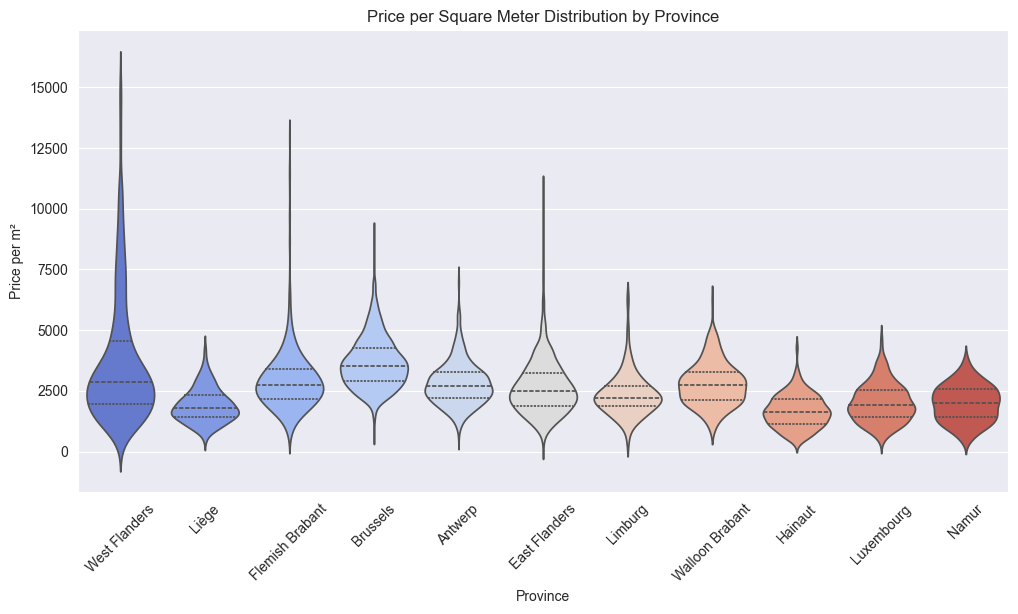

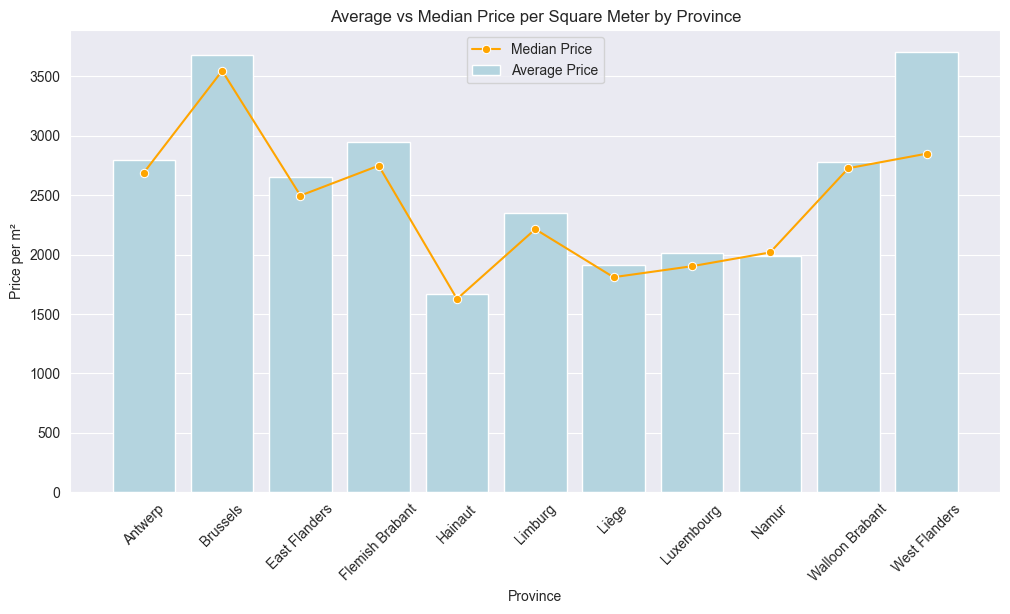

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.violinplot(x='Province', y='Price per m²', data=df_cleaned, inner='quartile', palette='coolwarm')
plt.title('Price per Square Meter Distribution by Province')
plt.xticks(rotation=45)
plt.ylabel('Price per m²')
plt.xlabel('Province')
plt.show()
# Calculate average and median prices per province
price_stats = df_cleaned.groupby('Province').agg({'Price per m²': ['mean', 'median']}).reset_index()
price_stats.columns = ['Province', 'Average Price per m²', 'Median Price per m²']

plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='Average Price per m²', data=price_stats, color='lightblue', label='Average Price')
sns.lineplot(x='Province', y='Median Price per m²', data=price_stats, color='orange', marker='o', label='Median Price')
plt.title('Average vs Median Price per Square Meter by Province')
plt.xticks(rotation=45)
plt.ylabel('Price per m²')
plt.xlabel('Province')
plt.legend()
plt.show()

## Yeliz

/var/folders/l5/7p063qh11pgdrhzhyzjztv3c0000gn/T/ipykernel_69282/578191459.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette='coolwarm')


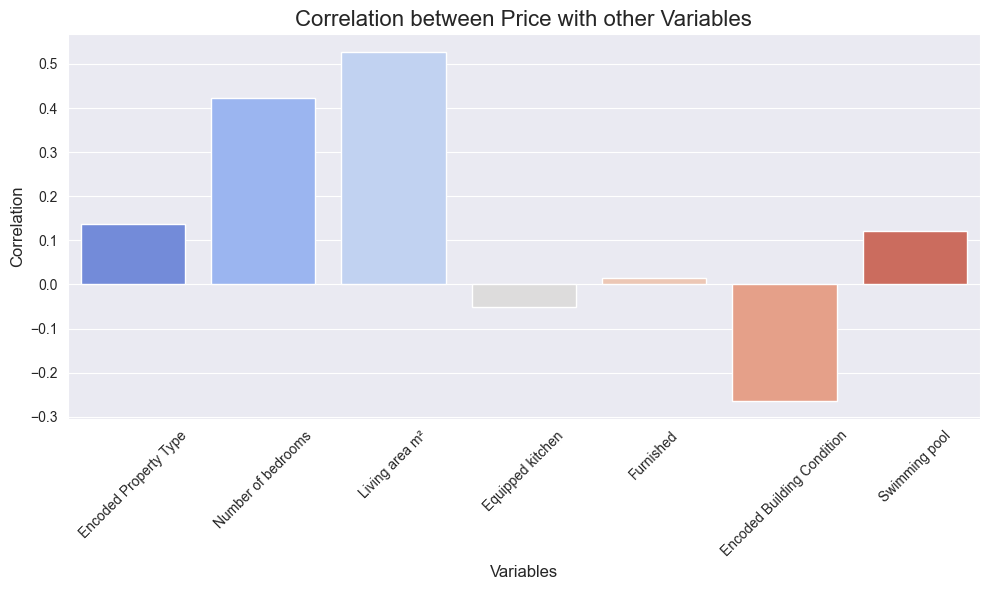

/var/folders/l5/7p063qh11pgdrhzhyzjztv3c0000gn/T/ipykernel_69282/578191459.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted['Region'] = df_sorted['Locality data'].apply(get_region)
/var/folders/l5/7p063qh11pgdrhzhyzjztv3c0000gn/T/ipykernel_69282/578191459.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted['Province'] = df_sorted['Locality data'].apply(get_province)
/var/folders/l5/7p063qh11pgdrhzhyzjztv3c0000gn/T/ipykernel_69282/578191459.py:104: SettingWithCopyWarning: 
A value is

   Living area m² Living Area Group2
0           125.0          100-200m²
1           193.0          100-200m²
2           131.0          100-200m²
3           237.0          200-300m²
4           225.0          200-300m²


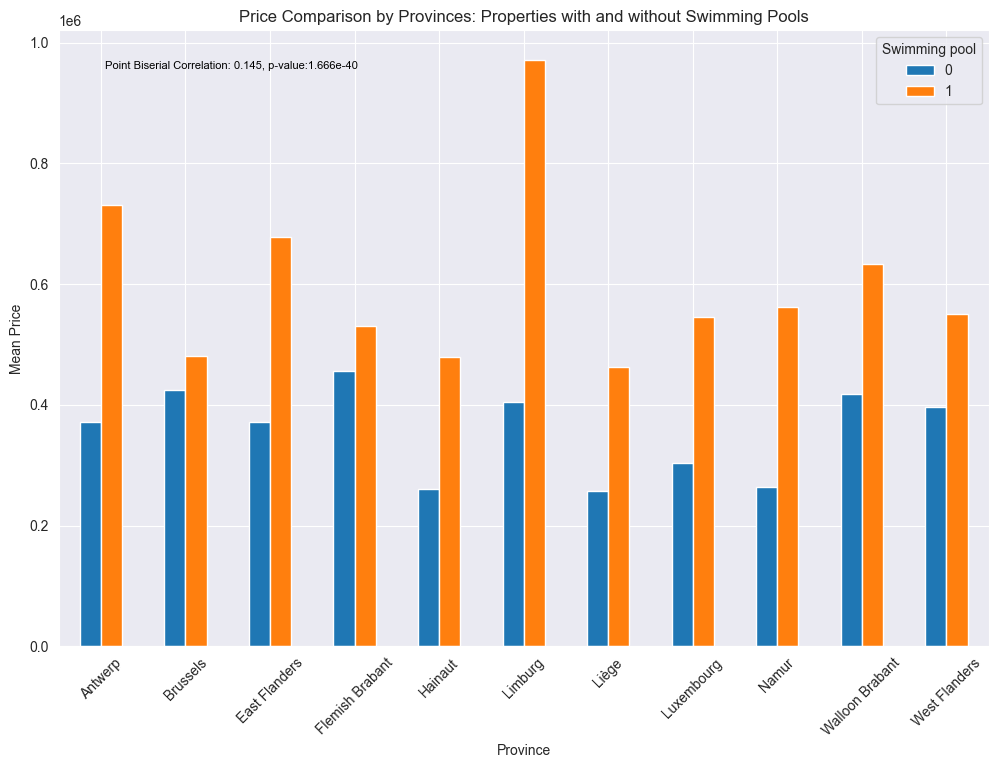

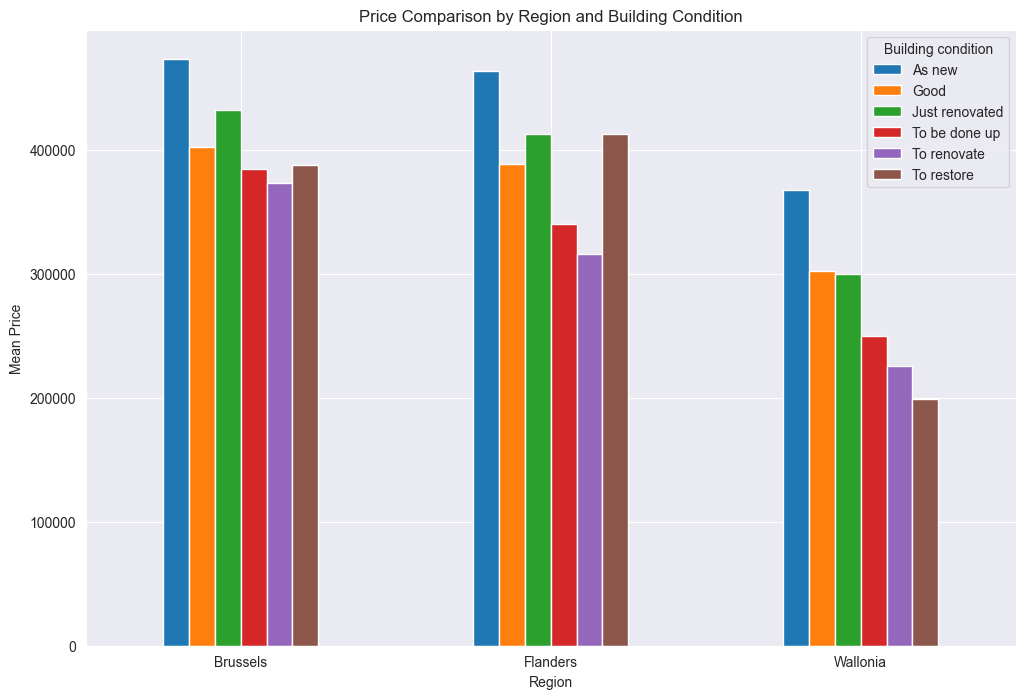

/var/folders/l5/7p063qh11pgdrhzhyzjztv3c0000gn/T/ipykernel_69282/578191459.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = apartments_df.groupby(['Province', 'Living Area Group2'])['Price'].mean().unstack()


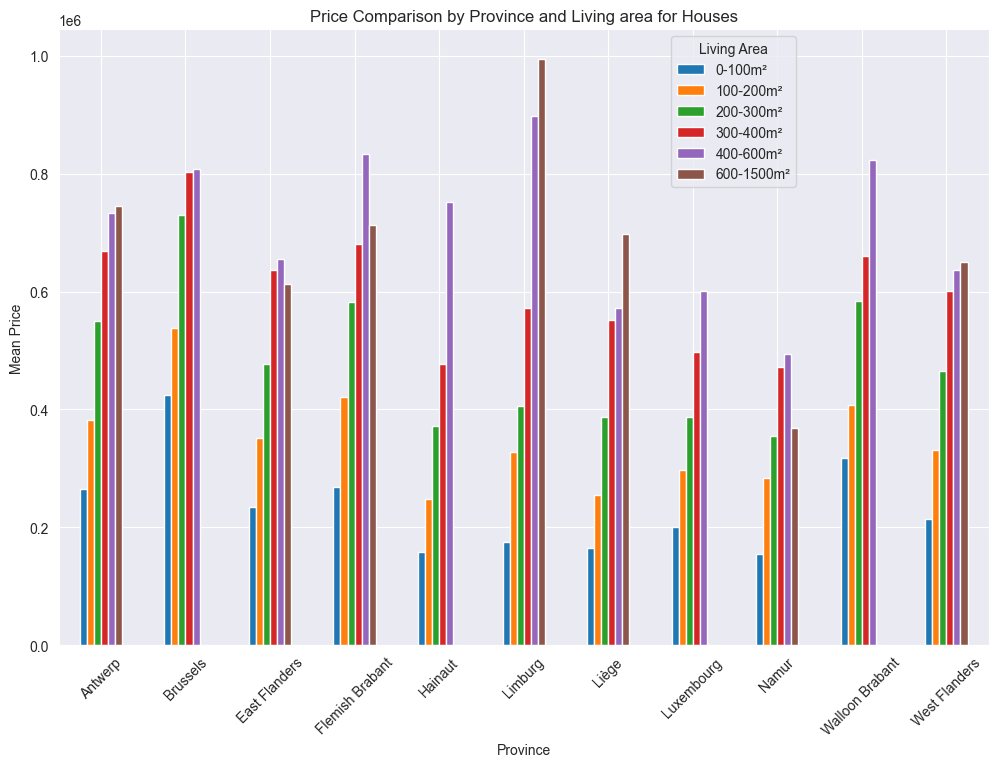

/var/folders/l5/7p063qh11pgdrhzhyzjztv3c0000gn/T/ipykernel_69282/578191459.py:145: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = apartments_df.groupby(['Province', 'Living Area Group2'])['Price'].mean().unstack()


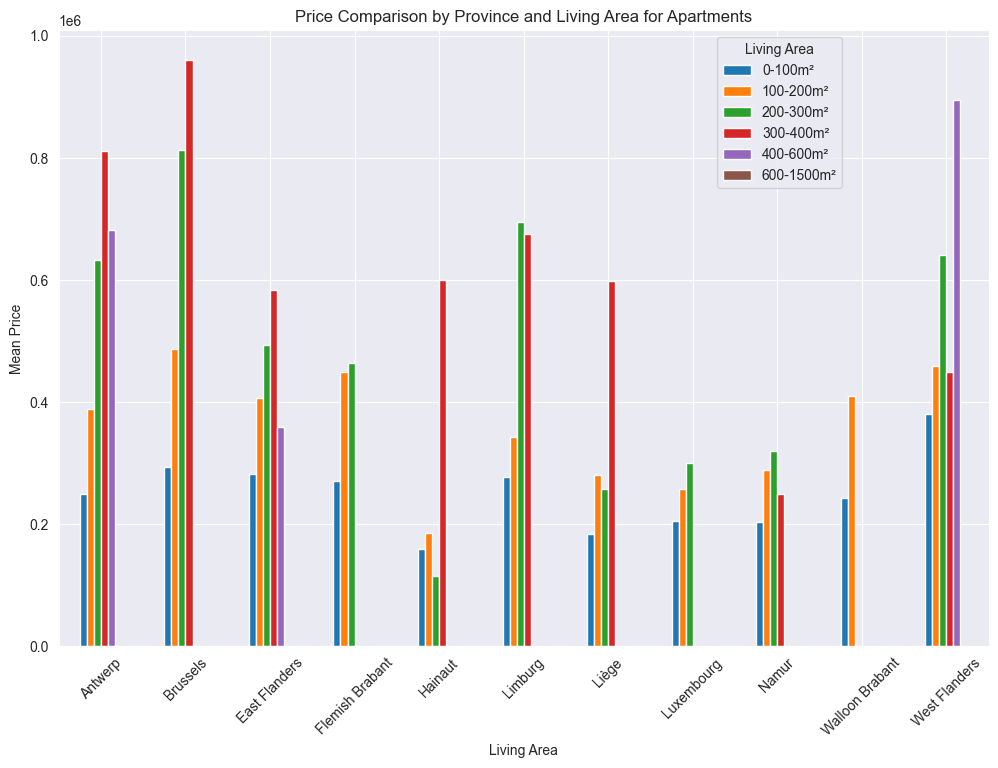

In [60]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Get counts of unique values for building condition and property type
condition_counts = df['Building condition'].value_counts()
property_counts = df['Property type'].value_counts()
# Initialize the LabelEncoder
label_encoder_property_type = LabelEncoder()
label_encoder_condition = LabelEncoder()
# Fit and transform on the original data
df['Encoded Property Type'] = label_encoder_property_type.fit_transform(df['Property type'])
df['Encoded Building Condition'] = label_encoder_condition.fit_transform(df['Building condition'])
original_conditions = label_encoder_condition.inverse_transform(df['Encoded Building Condition'])
original_types = label_encoder_property_type.inverse_transform(df['Encoded Property Type'])
# Get counts of unique values for building condition and property type
condition_counts = df['Building condition'].value_counts()
property_counts = df['Property type'].value_counts()
# Initialize the LabelEncoder
label_encoder_property_type = LabelEncoder()
label_encoder_condition = LabelEncoder()
# Fit and transform on the original data
df['Encoded Property Type'] = label_encoder_property_type.fit_transform(df['Property type'])
df['Encoded Building Condition'] = label_encoder_condition.fit_transform(df['Building condition'])

df_sorted = df[df['Price'] < 1000000]


# Correlation between Price and Other Variables
columns_for_spearman=['Price','Encoded Property Type','Number of bedrooms','Living area m²',
                     'Equipped kitchen','Furnished','Encoded Building Condition','Swimming pool']
df_selected=df_sorted[columns_for_spearman]
correlation_matrix_selected = df_selected.corr(method='spearman')
correlation_with_price = correlation_matrix_selected['Price'].drop('Price')
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette='coolwarm')
plt.title('Correlation between Price with other Variables', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Function to determine the region by zip code
def get_region(postal_code):
    if 1000 <= postal_code <= 1299:
        return 'Brussels'
    elif 1300 <= postal_code <= 1499 or 4000 <= postal_code <= 7999:
        return 'Wallonia'
    elif 1500 <= postal_code <= 3999 or 8000 <= postal_code <= 9999 :
        return 'Flanders'
    else:
        return 'Unknown'

# Add a new 'Region' column based on zip code
df_sorted['Region'] = df_sorted['Locality data'].apply(get_region)


# A function to determine the province by postal code
def get_province(postal_code):
    # Flanders
    if 1500 <= postal_code <= 1999 or 3000 <=postal_code <=3499:
        return 'Flemish Brabant'
    elif 2000 <= postal_code <= 2999:
        return 'Antwerp'
    elif 3500 <= postal_code <= 3999:
        return 'Limburg'
    elif 8000 <= postal_code <= 8999:
        return 'West Flanders'
    elif 9000 <= postal_code <= 9999:
        return 'East Flanders'

    # Wallonia
    elif 1300 <= postal_code <= 1499:
        return 'Walloon Brabant'
    elif 4000 <= postal_code <= 4999:
        return 'Liège'
    elif 5000 <= postal_code <= 5999:
        return 'Namur'
    elif 6000 <= postal_code <= 6599 or 7000 <= postal_code <= 7999:
        return 'Hainaut'
    elif 6600 <= postal_code <= 6999:
        return 'Luxembourg'

    # Brussels
    elif 1000 <= postal_code <= 1299:
        return 'Brussels'

    else:
        return 'Unknown'

# Adding a new column 'Province' based on the postal code
df_sorted['Province'] = df_sorted['Locality data'].apply(get_province)


# Dividing Living Area into intervals
df_sorted['Living area m²'].min()
df_sorted['Living area m²'].max()
bins = [0, 100, 200, 300, 400, 600, 1500]
labels = ['0-100m²', '100-200m²', '200-300m²', '300-400m²', '400-600m²', '600-1500m²']
df_sorted['Living Area Group2'] = pd.cut(df_sorted['Living area m²'], bins=bins, labels=labels, include_lowest=True)
print(df_sorted[['Living area m²', 'Living Area Group2']].head())

# Price Comparison by Provinces: Properties with and without Swimming Pools
means = df_sorted.groupby(['Province', 'Swimming pool'])['Price'].mean().unstack()
means.plot(kind='bar', figsize=(12, 8))
plt.title('Price Comparison by Provinces: Properties with and without Swimming Pools')
plt.ylabel('Mean Price')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.text(0.05, 0.95, f'Point Biserial Correlation: 0.145, p-value:1.666e-40',
         ha='left', va='top', transform=plt.gca().transAxes, fontsize=8, color='black')
plt.legend(title='Swimming pool')
plt.show()


# Price Comparison by Region and Building Condition
means = df_sorted.groupby(['Region', 'Building condition'])['Price'].mean().unstack()
means.plot(kind='bar', figsize=(12, 8))
plt.title('Price Comparison by Region and Building Condition')
plt.ylabel('Mean Price')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.legend(title='Building condition')
plt.show()


# Price Comparison by Province and Living area for Houses
apartments_df = df_sorted[df_sorted['Property type'] == 'house']
means = apartments_df.groupby(['Province', 'Living Area Group2'])['Price'].mean().unstack()
means.plot(kind='bar', figsize=(12, 8))
plt.title('Price Comparison by Province and Living area for Houses')
plt.ylabel('Mean Price')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.legend(title='Living Area', bbox_to_anchor=(0.80, 1))
plt.show()


# Price Comparison by Province and Living Area for Apartments
apartments_df = df_sorted[df_sorted['Property type'] == 'apartment']
means = apartments_df.groupby(['Province', 'Living Area Group2'])['Price'].mean().unstack()
means.plot(kind='bar', figsize=(12, 8))
plt.title('Price Comparison by Province and Living Area for Apartments')
plt.ylabel('Mean Price')
plt.xlabel('Living Area')
plt.xticks(rotation=45)
plt.legend(title='Living Area', bbox_to_anchor=(0.85, 1))
plt.show()

### The proportion of missing values per column.

The output will display a decimal value between 0.0-1.0 representing the proportion of missing values. E.g. Garden area m^2 has approximately 72% of its values missing.

In [77]:
# The proportion of missing values per column.
missing_proportion=df.isnull().sum() / len(df)
missing_proportion=missing_proportion.sort_values (ascending=False)
print(missing_proportion)


Garden area m²                0.714381
Terrace surface m²            0.519097
Number of facades             0.295140
Unnamed: 0                    0.000000
Open fire                     0.000000
Encoded Property Type         0.000000
Building condition            0.000000
Swimming pool                 0.000000
Furnished                     0.000000
Property ID                   0.000000
Equipped kitchen              0.000000
Living area m²                0.000000
Number of bedrooms            0.000000
Property type                 0.000000
Price                         0.000000
Locality data                 0.000000
Encoded Building Condition    0.000000
dtype: float64
